<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2

En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.
En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1).



In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')

import plotly
plotly.__version__

'5.5.0'

In [42]:
# Abrimos el Dataframe que guardamos en el ejercicio anterior
url = 'https://raw.githubusercontent.com/NataliaGrasselli/DiploDatos2022/main/merged_sales_df.csv'
merged_sales_df = pd.read_csv(url)
merged_sales_df.drop(columns=merged_sales_df.columns[0], axis=1, inplace=True) #le sacamos el index que tenia guardado el archivo
merged_sales_df[:3]


,Suburb,Type,Landsize,BuildingArea,Rooms,Bathroom,Bedroom2,YearBuilt,Price,Postcode,zipcode,price,weekly_price,monthly_price
0,Abbotsford,h,202.0,NaN,2,1.0,2.0,NaN,1480000.0,3067.0,3067.0,130.624031,605.152174,2187.032258
1,Abbotsford,h,156.0,79.0,2,1.0,2.0,1900.0,1035000.0,3067.0,3067.0,130.624031,605.152174,2187.032258
2,Abbotsford,h,134.0,150.0,3,2.0,3.0,1900.0,1465000.0,3067.0,3067.0,130.624031,605.152174,2187.032258


In [43]:
merged_sales_df.columns

Index(['Suburb', 'Type', 'Landsize', 'BuildingArea', 'Rooms', 'Bathroom',
       'Bedroom2', 'YearBuilt', 'Price', 'Postcode', 'zipcode', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')

## Ejercicio 1: Encoding 

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [44]:
#tenemos 3 tipos de columnas:
# 1. Las que vamos a excluir porque en este punto no nos interesan
# 2. Categoricas, sobre las que vamos  aplicar one hot encoder
# 3. Numericas

categorical_cols = ['Type']#'Suburb',
numerical_cols = ['Landsize', 'Price', 'Rooms', 'Bathroom', 'Bedroom2', 'Postcode', 'zipcode', 'price', 'weekly_price', 'monthly_price']
excluded_cols = ['BuildingArea','YearBuilt']

Vamos a empezar sacando las columnas que no nos interesan en este apartado:

In [45]:
#tomamos todas las columnas menos las que no nos interesan: YearBuilt y Building Area 
df_to_encode = merged_sales_df[~merged_sales_df.isin(excluded_cols)]

In [46]:
df_to_encode[:3]

,Suburb,Type,Landsize,BuildingArea,Rooms,Bathroom,Bedroom2,YearBuilt,Price,Postcode,zipcode,price,weekly_price,monthly_price
0,Abbotsford,h,202.0,NaN,2,1.0,2.0,NaN,1480000.0,3067.0,3067.0,130.624031,605.152174,2187.032258
1,Abbotsford,h,156.0,79.0,2,1.0,2.0,1900.0,1035000.0,3067.0,3067.0,130.624031,605.152174,2187.032258
2,Abbotsford,h,134.0,150.0,3,2.0,3.0,1900.0,1465000.0,3067.0,3067.0,130.624031,605.152174,2187.032258


### Opción 1: One-Hot Encoder

> Consigna: Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 

One-Hot Encoding es el proceso mediante el cual convertimos datos categoricos en numericos, para después poder aplicarlos a un modelo de ML. Las variables categoricas se convierten en variables binarias; creando una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

Sklearn trae una herramienta que nos permite aplicar este tipo de encoding, se llama OneHotEncoder. Esta clase solo puede aplicarse sobre columnas categoricas, por lo que vamos a dividir nuestro df en dos:

In [47]:
#Separamos el df en dos: uno con variables categoricas exclusivamente y otro con variables numericas exclusivamente

#df de variables categoricas
categorical_df = df_to_encode[categorical_cols]
categorical_df[:3]

,Type
0,h
1,h
2,h


In [48]:
# Check for nulls
categorical_df.isna().sum()

Type    0
dtype: int64

In [49]:
#df de variables numericas
numerical_df = df_to_encode[numerical_cols]
numerical_df[:3]

,Landsize,Price,Rooms,Bathroom,Bedroom2,Postcode,zipcode,price,weekly_price,monthly_price
0,202.0,1480000.0,2,1.0,2.0,3067.0,3067.0,130.624031,605.152174,2187.032258
1,156.0,1035000.0,2,1.0,2.0,3067.0,3067.0,130.624031,605.152174,2187.032258
2,134.0,1465000.0,3,2.0,3.0,3067.0,3067.0,130.624031,605.152174,2187.032258


Ahora, vamos a aplicar el metodo OneHotEncoding de sklearn sobre las variables categoricas

In [50]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(categorical_df)

OneHotEncoder()

In [51]:
#Nombres de las columnas categoricas
enc.feature_names_in_

array(['Type'], dtype=object)

In [52]:
#Unique categories found when fitting
enc.categories_

[array(['h', 't', 'u'], dtype=object)]

In [53]:
#transformamos los datos.
encoded_matrix = enc.transform(categorical_df)
encoded_matrix

<13570x3 sparse matrix of type '<class 'numpy.float64'>'
	with 13570 stored elements in Compressed Sparse Row format>

El resultado es una matriz esparsa. A esta debemos agregarle nuevamente las variables numericas que habiamos descartadoa antes.

In [54]:
from scipy import sparse

# Stack numerical columns onto the left of the sparse matrix
full_matrix = sparse.hstack((sparse.csr_matrix(numerical_df.values), encoded_matrix))
full_matrix

# Keep track of features
features = np.concatenate((numerical_df.columns.values, enc.get_feature_names_out()))

### Opción 2: DictVectorizer

> Consigna: Utilizar `DictVectorizer` con algunos pasos de pre-proceso previo. 

In [55]:
#Opción 2 - pre-procesamiento para luego usar DictVectorizer
feature_cols = ['Suburb', 'Type', 'Landsize', 'Rooms',
       'Bathroom', 'Bedroom2', 'Price', 'Postcode', 'zipcode',
       'price', 'weekly_price', 'monthly_price']
feature_dict = list(merged_sales_df[feature_cols].T.to_dict().values())
feature_dict[:2]

[{'Bathroom': 1.0,
  'Bedroom2': 2.0,
  'Landsize': 202.0,
  'Postcode': 3067.0,
  'Price': 1480000.0,
  'Rooms': 2,
  'Suburb': 'Abbotsford',
  'Type': 'h',
  'monthly_price': 2187.032258064516,
  'price': 130.62403100775194,
  'weekly_price': 605.1521739130435,
  'zipcode': 3067.0},
 {'Bathroom': 1.0,
  'Bedroom2': 2.0,
  'Landsize': 156.0,
  'Postcode': 3067.0,
  'Price': 1035000.0,
  'Rooms': 2,
  'Suburb': 'Abbotsford',
  'Type': 'h',
  'monthly_price': 2187.032258064516,
  'price': 130.62403100775194,
  'weekly_price': 605.1521739130435,
  'zipcode': 3067.0}]

In [56]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

In [57]:
feature_matrix

<13570x326 sparse matrix of type '<class 'numpy.float64'>'
	with 162840 stored elements in Compressed Sparse Row format>

In [58]:
vec.get_feature_names()[:10] 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Bathroom',
 'Bedroom2',
 'Landsize',
 'Postcode',
 'Price',
 'Rooms',
 'Suburb=Abbotsford',
 'Suburb=Aberfeldie',
 'Suburb=Airport West',
 'Suburb=Albanvale']

Se obtiene de esta manera una matriz esparsa.

In [59]:
# Fill nan values on sparse matrix.
if np.any(np.isnan(feature_matrix.data)):
  feature_matrix.data = np.nan_to_num(feature_matrix.data)

In [60]:
# Se calcula el tamaño aproximado de la matriz densa a generar
matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("La matriz densa pesará aprox {:.2f} MB".format(matrix_size_mb))

La matriz densa pesará aprox 16.88 MB


In [61]:
limit_size_mb = 10
precision_type = np.float32
if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
  dense_feature_matrix = feature_matrix.astype(precision_type).todense()
else:
  # We calculate how many rows would fit given the number of columns
  n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
  print("Matriz en demasiado grande! Usando únicamente {} de {} filas".format(
      n_rows, feature_matrix.shape[0]))
  dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

print("Tamaño final: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

Matriz en demasiado grande! Usando únicamente 8041 de 13570 filas
Tamaño final: 10.00


In [62]:
# Se recorta el df original.
if dense_feature_matrix.shape[0] < len(merged_sales_df):
  merged_sales_df_sample = merged_sales_df.iloc[:dense_feature_matrix.shape[0]]
else:
  merged_sales_df_sample = merged_sales_df

In [63]:
merged_sales_df_sample[:5]

,Suburb,Type,Landsize,BuildingArea,Rooms,Bathroom,Bedroom2,YearBuilt,Price,Postcode,zipcode,price,weekly_price,monthly_price
0,Abbotsford,h,202.0,NaN,2,1.0,2.0,NaN,1480000.0,3067.0,3067.0,130.624031,605.152174,2187.032258
1,Abbotsford,h,156.0,79.0,2,1.0,2.0,1900.0,1035000.0,3067.0,3067.0,130.624031,605.152174,2187.032258
2,Abbotsford,h,134.0,150.0,3,2.0,3.0,1900.0,1465000.0,3067.0,3067.0,130.624031,605.152174,2187.032258
3,Abbotsford,h,94.0,NaN,3,2.0,3.0,NaN,850000.0,3067.0,3067.0,130.624031,605.152174,2187.032258
4,Abbotsford,h,120.0,142.0,4,1.0,3.0,2014.0,1600000.0,3067.0,3067.0,130.624031,605.152174,2187.032258


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_dense_feature_matrix = scaler.fit_transform(dense_feature_matrix)
np.max(scaled_dense_feature_matrix), np.min(scaled_dense_feature_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(1.0000001, -1.0)

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(scaled_dense_feature_matrix)
proyected_features = pca.transform(scaled_dense_feature_matrix)
proyected_features.shape

(8041, 15)

In [66]:
pca.explained_variance_ratio_

array([0.23215294, 0.07125715, 0.06572384, 0.03278911, 0.01862427,
       0.01659805, 0.01616511, 0.01379625, 0.01292992, 0.01176432,
       0.01139029, 0.01078596, 0.01042431, 0.01037167, 0.00993052],
      dtype=float32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


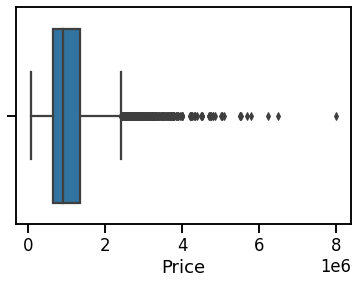

In [67]:
sns.boxplot(merged_sales_df_sample.Price)

In [68]:
merged_sales_df_sample[['pca1_scaled', 'pca2_scaled']] = proyected_features[:,:2]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [69]:
merged_sales_df_sample[:3]

,Suburb,Type,Landsize,BuildingArea,Rooms,Bathroom,Bedroom2,YearBuilt,Price,Postcode,zipcode,price,weekly_price,monthly_price,pca1_scaled,pca2_scaled
0,Abbotsford,h,202.0,NaN,2,1.0,2.0,NaN,1480000.0,3067.0,3067.0,130.624031,605.152174,2187.032258,-0.828960,-0.033687
1,Abbotsford,h,156.0,79.0,2,1.0,2.0,1900.0,1035000.0,3067.0,3067.0,130.624031,605.152174,2187.032258,-0.822088,-0.027027
2,Abbotsford,h,134.0,150.0,3,2.0,3.0,1900.0,1465000.0,3067.0,3067.0,130.624031,605.152174,2187.032258,-0.906270,-0.015757


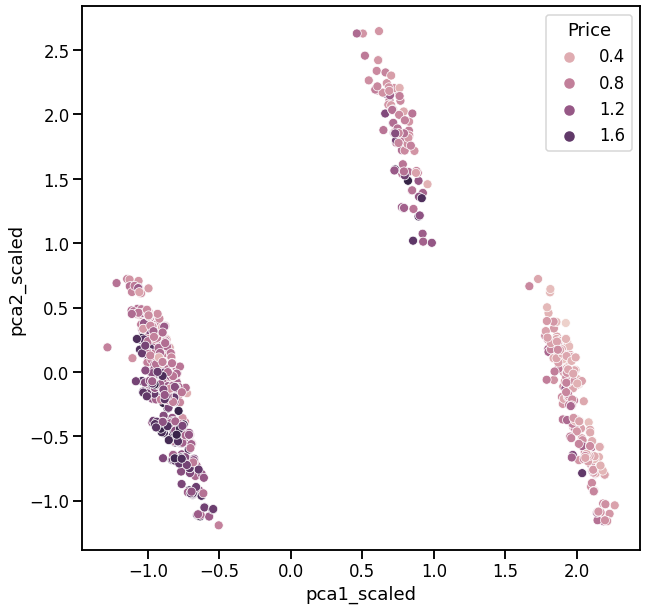

In [70]:
data = merged_sales_df_sample[merged_sales_df_sample.Price < 2000000].sample(1000)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='pca1_scaled', y='pca2_scaled',
                    hue='Price')  # 'Landsize' 'Price' 'YearBuilt'

## Ejercicio 2: Imputación por KNN 

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.



#### 1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.

In [71]:
from scipy import sparse

# Stack YearBuilt y BuildingArea onto the left of the sparse matrix
matrix = sparse.hstack((sparse.csr_matrix(merged_sales_df[excluded_cols].values), full_matrix))
matrix

# Keep track of features
all_features = np.concatenate((merged_sales_df[excluded_cols].columns.values, numerical_df.columns.values, enc.get_feature_names_out()))

In [72]:
matrix

<13570x15 sparse matrix of type '<class 'numpy.float64'>'
	with 174405 stored elements in COOrdinate format>

#### 2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?

Para poder aplicar KNeighborsRegressor es necesario que todas las variables sean numericas (ya lo conseguimos en el apartado anterior) y estén estandarizadas. Para lograr esto último, vamos a utilizar el metodo StandasScaler de sklearn (podríamos también haber usado otros, como MinMaxScaler)

In [73]:
from sklearn.preprocessing import StandardScaler

#Escalamos la matriz
ss = StandardScaler(with_mean=False)
ss.fit(matrix)
scaled_matrix = ss.transform(matrix)

In [74]:
scaled_matrix[[0,1]]

<2x15 sparse matrix of type '<class 'numpy.float64'>'
	with 26 stored elements in Compressed Sparse Row format>

Para usar el IterativeImputer necesitamos un array denso:

In [75]:
#creo el df
scaled_df = pd.DataFrame.sparse.from_spmatrix(scaled_matrix, index=None, columns=all_features)

#transformo el df de sparse a dense
dense_df = scaled_df.sparse.to_dense()

Ahora sí, ya estamos listos para imputar los valores faltantes:

In [76]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = dense_df.copy(deep=True) #hacemos una copia de la matri

#definimos el imputador
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

#lo aplicamos - devuelve un array
melb_data_mice = mice_imputer.fit_transform(melb_data_mice)

#pasamos de array a df y agregamos nombre columnas
full_df = pd.DataFrame(melb_data_mice, columns=all_features)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [77]:
full_df[:5]

,BuildingArea,YearBuilt,Landsize,Price,Rooms,Bathroom,Bedroom2,Postcode,zipcode,price,weekly_price,monthly_price,Type_h,Type_t,Type_u
0,0.792473,52.514045,0.142458,2.317581,2.101315,1.464542,2.110928,33.830575,36.767092,2.019018,1.78719,1.50679,2.173148,0.0,0.0
1,0.613778,52.348733,0.110017,1.620741,2.101315,1.464542,2.110928,33.830575,36.767092,2.019018,1.78719,1.50679,2.173148,0.0,0.0
2,1.165401,52.348733,0.094502,2.294092,3.151973,2.929084,3.166392,33.830575,36.767092,2.019018,1.78719,1.50679,2.173148,0.0,0.0
3,0.907459,54.541869,0.066292,1.331043,3.151973,2.929084,3.166392,33.830575,36.767092,2.019018,1.78719,1.50679,2.173148,0.0,0.0
4,1.103246,55.489657,0.084628,2.505493,4.202630,1.464542,3.166392,33.830575,36.767092,2.019018,1.78719,1.50679,2.173148,0.0,0.0


#### 3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [78]:
mice_year_built = full_df.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'

melb_year_build = dense_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'

data_year = pd.concat([mice_year_built, melb_year_build], ignore_index=True)

data_year[:3]

,YearBuilt,Imputation
0,52.514045,KNN over YearBuilt and BuildingArea
1,52.348733,KNN over YearBuilt and BuildingArea
2,52.348733,KNN over YearBuilt and BuildingArea


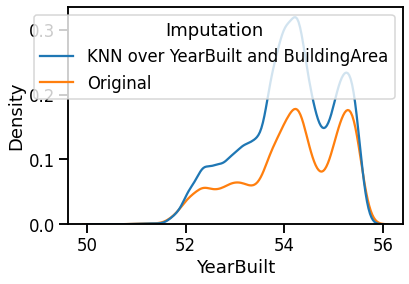

In [79]:
sns.kdeplot(data=data_year, x='YearBuilt', hue='Imputation')

In [80]:
mice_area = full_df.BuildingArea.to_frame()
mice_area['Imputation'] = 'KNN over YearBuilt and BuildingArea'

melb_area = dense_df.BuildingArea.dropna().to_frame()
melb_area['Imputation'] = 'Original'

data_area = pd.concat([mice_area, melb_area], ignore_index=True)

data_area[:3]

,BuildingArea,Imputation
0,0.792473,KNN over YearBuilt and BuildingArea
1,0.613778,KNN over YearBuilt and BuildingArea
2,1.165401,KNN over YearBuilt and BuildingArea


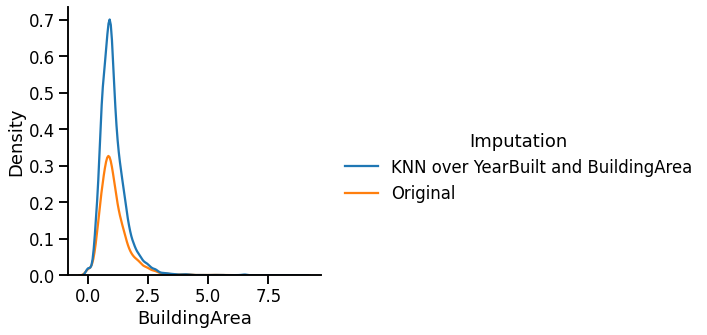

In [81]:
sns.displot(data=data_area[data_area.BuildingArea<9], x='BuildingArea', hue='Imputation', kind="kde")

## Ejercicio 3: Reducción de dimensionalidad. 

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

#### 1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos

Para comenzar volvemos a convertir en un matriz que estandarizamos y escalamos para lograr hegemonia de unidades


In [82]:
encode = OneHotEncoder()
encode.fit(full_df)

OneHotEncoder()

In [83]:
melb_data_mice_matrix = encode.transform(full_df)

In [84]:
if np.any(np.isnan(melb_data_mice_matrix.data)):
  melb_data_mice_matrix.data = np.nan_to_num(melb_data_mice_matrix.data)

In [85]:
#Escalamos la matriz nuevamente
ss = StandardScaler(with_mean=False)
ss.fit(melb_data_mice_matrix)
melb_data_mice_scaled_matrix = ss.transform(melb_data_mice_matrix)

In [86]:
#Calculamos peso de la matriz para ver si es conveniente reducir
matrix_size_mb = melb_data_mice_scaled_matrix.shape[0] * melb_data_mice_scaled_matrix.shape[1] * 4 / 1024 / 1024
print("La matriz densa pesará aprox {:.2f} MB".format(matrix_size_mb))

La matriz densa pesará aprox 488.61 MB


In [87]:
limit_size_mb = 10
precision_type = np.float32
if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
  melb_dense_feature_matrix = melb_data_mice_scaled_matrix.astype(precision_type).todense()
else:
  # We calculate how many rows would fit given the number of columns
  n_rows = int(limit_size_mb *1024 * 1024 / 4 / melb_data_mice_scaled_matrix.shape[1])
  print("Matriz en demasiado grande! Usando únicamente {} de {} filas".format(
      n_rows, melb_data_mice_scaled_matrix.shape[0]))
  melb_dense_feature_matrix = melb_data_mice_scaled_matrix[:n_rows].astype(precision_type).todense()

print("Tamaño final: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

Matriz en demasiado grande! Usando únicamente 277 de 13570 filas
Tamaño final: 10.00


In [88]:
# Se recorta el df original.
if melb_dense_feature_matrix.shape[0] < len(merged_sales_df):
  melb_merged_sales_df_sample = merged_sales_df.iloc[:melb_dense_feature_matrix.shape[0]]
else:
  melb_merged_sales_df_sample = merged_sales_df

In [89]:
#Escalamos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
melb_scaled_dense_feature_matrix = scaler.fit_transform(melb_dense_feature_matrix)
np.max(melb_scaled_dense_feature_matrix), np.min(melb_scaled_dense_feature_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


(1.0, -1.0)

In [90]:
#Obtenemos n = 20
from sklearn.decomposition import PCA
melb_pca = PCA(n_components=20)
melb_pca.fit(melb_scaled_dense_feature_matrix)
melb_proyected_features = melb_pca.transform(melb_scaled_dense_feature_matrix)
melb_proyected_features.shape

(277, 20)

In [91]:
melb_proyected_features

array([[ 0.30768245,  0.09410736,  3.9229705 , ..., -0.06038392,
        -0.05197275,  0.04538726],
       [ 0.27621514, -0.01467349,  4.0454435 , ...,  0.13942797,
        -0.03315536,  0.04493112],
       [-1.9290192 , -0.47881696,  1.0548793 , ...,  0.16718452,
        -0.02119182, -0.01447695],
       ...,
       [ 2.1647525 , -1.5719078 , -2.8964062 , ..., -0.11289819,
         0.41333586, -0.20143558],
       [ 0.42699838, -2.6197176 , -3.294472  , ..., -0.12902598,
        -0.08742499, -0.10558987],
       [ 1.3337517 , -2.779996  , -1.9485378 , ..., -0.27652177,
        -0.8363898 , -0.23347741]], dtype=float32)

#### 2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.

In [92]:
melb_pca.explained_variance_ratio_

array([0.11989242, 0.0809109 , 0.07751707, 0.06942957, 0.06303919,
       0.05041727, 0.04248004, 0.04032119, 0.0288158 , 0.02587653,
       0.01686453, 0.01083806, 0.00993485, 0.00840226, 0.00641843,
       0.00622689, 0.00551527, 0.00491973, 0.00468291, 0.00438744],
      dtype=float32)

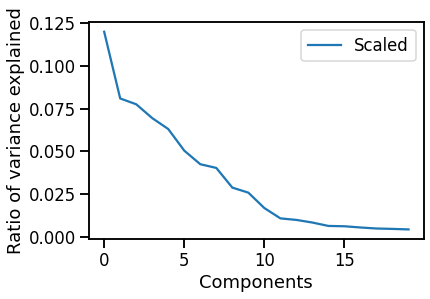

In [93]:
# Gráfico de la varianza capturada por los primeros n componentes principales, para cada  n
sns.lineplot(x=range(melb_pca.n_components),
                 y=melb_pca.explained_variance_ratio_, label='Scaled')
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")
plt.legend()

#### 3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [94]:
#Se seleccionan primeras 2 columnas, en primer lugar habiamos seleccionado 4 pero consideramos que 2 son suficientes ya que a partir del tercero la linea se vuelve recta y los demas 
#componentes mostraran una explicación de la varianza no significativa
melb_merged_sales_df_sample[['pca1_scaled', 'pca2_scaled']] = melb_proyected_features[:,[0,1]]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [95]:
melb_merged_sales_df_sample[:5]

,Suburb,Type,Landsize,BuildingArea,Rooms,Bathroom,Bedroom2,YearBuilt,Price,Postcode,zipcode,price,weekly_price,monthly_price,pca1_scaled,pca2_scaled
0,Abbotsford,h,202.0,NaN,2,1.0,2.0,NaN,1480000.0,3067.0,3067.0,130.624031,605.152174,2187.032258,0.307682,0.094107
1,Abbotsford,h,156.0,79.0,2,1.0,2.0,1900.0,1035000.0,3067.0,3067.0,130.624031,605.152174,2187.032258,0.276215,-0.014673
2,Abbotsford,h,134.0,150.0,3,2.0,3.0,1900.0,1465000.0,3067.0,3067.0,130.624031,605.152174,2187.032258,-1.929019,-0.478817
3,Abbotsford,h,94.0,NaN,3,2.0,3.0,NaN,850000.0,3067.0,3067.0,130.624031,605.152174,2187.032258,-1.910671,-0.334130
4,Abbotsford,h,120.0,142.0,4,1.0,3.0,2014.0,1600000.0,3067.0,3067.0,130.624031,605.152174,2187.032258,-1.045113,-0.187914


## Ejercicio 4: Composición del resultado 

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [96]:
new_columns = []

In [97]:
new_columns.extend(categorical_cols)

In [98]:
new_columns.extend(numerical_cols)

In [99]:
new_columns.extend(['pca1_scaled', 'pca2_scaled'])

In [100]:
# armamos el nuevo dataframe
pca_final_df = pd.DataFrame(data=melb_merged_sales_df_sample, columns=new_columns)
pca_final_df.head()

,Type,Landsize,Price,Rooms,Bathroom,Bedroom2,Postcode,zipcode,price,weekly_price,monthly_price,pca1_scaled,pca2_scaled
0,h,202.0,1480000.0,2,1.0,2.0,3067.0,3067.0,130.624031,605.152174,2187.032258,0.307682,0.094107
1,h,156.0,1035000.0,2,1.0,2.0,3067.0,3067.0,130.624031,605.152174,2187.032258,0.276215,-0.014673
2,h,134.0,1465000.0,3,2.0,3.0,3067.0,3067.0,130.624031,605.152174,2187.032258,-1.929019,-0.478817
3,h,94.0,850000.0,3,2.0,3.0,3067.0,3067.0,130.624031,605.152174,2187.032258,-1.910671,-0.334130
4,h,120.0,1600000.0,4,1.0,3.0,3067.0,3067.0,130.624031,605.152174,2187.032258,-1.045113,-0.187914


In [101]:
pca_final_df.to_csv('pca_final_df.csv')

In [102]:
from google.colab import files
files.download('pca_final_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
